# Exercise 3 by Umar Zubair

## Data load

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from skimage.transform import rescale, resize, downscale_local_mean
from math import exp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

trainData1 = unpickle('C:/Users/Umar/Documents/MS/1st Period/Introduction to Pattern Recognition and Machine Learning/cifar-10-batches-py/data_batch_1')
trainData2 = unpickle('C:/Users/Umar/Documents/MS/1st Period/Introduction to Pattern Recognition and Machine Learning/cifar-10-batches-py/data_batch_2')
trainData3 = unpickle('C:/Users/Umar/Documents/MS/1st Period/Introduction to Pattern Recognition and Machine Learning/cifar-10-batches-py/data_batch_3')
trainData4 = unpickle('C:/Users/Umar/Documents/MS/1st Period/Introduction to Pattern Recognition and Machine Learning/cifar-10-batches-py/data_batch_4')
trainData5 = unpickle('C:/Users/Umar/Documents/MS/1st Period/Introduction to Pattern Recognition and Machine Learning/cifar-10-batches-py/data_batch_5')

x_train = np.concatenate((trainData1["data"],trainData2["data"],trainData3["data"],trainData4["data"],trainData5["data"]))
y_train = np.concatenate((trainData1["labels"],trainData2["labels"],trainData3["labels"],trainData4["labels"],trainData5["labels"]))

datadict = unpickle('C:/Users/Umar/Documents/MS/1st Period/Introduction to Pattern Recognition and Machine Learning/cifar-10-batches-py/test_batch')

x_test = datadict["data"]
y_test = datadict["labels"]

In [3]:
print("Shape of train data:", np.shape(x_train))
print("Shape of test data:", np.shape(x_test))

Shape of train data: (50000, 3072)
Shape of test data: (10000, 3072)


## Functions

In [4]:
def cifar10_n_color(X,n):  
    
    if len(X)==50000:
        X = X.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("float32")
        X_mean = np.zeros((50000,n,n,3))   
    else:
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float32")
        X_mean = np.zeros((10000,n,n,3))   
    for i in range(X.shape[0]):
        # Convert images to mean values of each color channel
        img = X[i]      
        img_n = resize(img, (n, n))        
        r_vals = img_n[:,:,0]
        g_vals = img_n[:,:,1]
        b_vals = img_n[:,:,2]
        X_mean[i] = np.array((r_vals, g_vals, b_vals)).transpose(1,2,0)

    return X_mean

In [5]:
def cifar_10_n_bayes_learn(Xf,Y,dim):
    
    data_r = dict()
    data_g = dict()
    data_b = dict()
    data = dict()
    Xf_sorted = np.arange(150000*dim*dim).reshape(10,5000,dim*dim*3).astype("float32")
    for i in range(0,len(Y)): 
        
        if Y[i] not in data_r:
            data_r[Y[i]] = np.array([])        
        if Y[i] not in data_g:
            data_g[Y[i]] = np.array([])       
        if Y[i] not in data_b:
            data_b[Y[i]] = np.array([])       
        if (Y[i] not in data):
            data[Y[i]] = np.array([])            
        data_r[Y[i]] = np.append(data_r[Y[i]],Xf[i][0])
        data_g[Y[i]] = np.append(data_g[Y[i]],Xf[i][1])
        data_b[Y[i]] = np.append(data_b[Y[i]],Xf[i][2])            
        data[Y[i]] = np.append(data[Y[i]],Xf[i])
        
    mean = np.arange(30*dim*dim).reshape(10,3*dim*dim).astype("float32")
    std = np.arange(10*(dim*dim*3)*(dim*dim*3)).reshape(10,dim*dim*3,dim*dim*3).astype("float32")
    p = np.full((10,1),0.1)
    
    for i in range(0,10):
        Xf_sorted[i] = data[i].reshape(5000,3*dim*dim)
        data_r[i] = data_r[i].reshape(5000,dim,dim)
        data_g[i] = data_g[i].reshape(5000,dim,dim)
        data_b[i] = data_b[i].reshape(5000,dim,dim)
        
        mean[i] = np.concatenate((np.mean(data_r[i],axis=0),np.mean(data_g[i],axis=0),np.mean(data_b[i],axis=0))).reshape(dim*dim*3)
        std[i] = np.cov(Xf_sorted[i],rowvar=False)

    return mean,std,p

In [6]:
def cifar_10_naivebayes_n_learn(Xf,Y,dim):
    
    data_r = dict()
    data_g = dict()
    data_b = dict()
    data = dict()
    Xf_sorted = np.arange(150000*dim*dim).reshape(10,5000,dim*dim*3).astype("float32")
    
    for i in range(0,len(Y)): 
        
        if Y[i] not in data_r:
            data_r[Y[i]] = np.array([])        
        if Y[i] not in data_g:
            data_g[Y[i]] = np.array([])       
        if Y[i] not in data_b:
            data_b[Y[i]] = np.array([])       
        if (Y[i] not in data):
            data[Y[i]] = np.array([])            
        data_r[Y[i]] = np.append(data_r[Y[i]],Xf[i][0])
        data_g[Y[i]] = np.append(data_g[Y[i]],Xf[i][1])
        data_b[Y[i]] = np.append(data_b[Y[i]],Xf[i][2])            
        data[Y[i]] = np.append(data[Y[i]],Xf[i])
        
    mean = np.arange(30*dim*dim).reshape(10,3*dim*dim).astype("float32")
    std = np.arange(30*dim*dim).reshape(10,3*dim*dim).astype("float32")
    
    p = np.full((10,1),0.1)    
    for i in range(0,10):
        data_r[i] = data_r[i].reshape(5000,dim,dim)
        data_g[i] = data_g[i].reshape(5000,dim,dim)
        data_b[i] = data_b[i].reshape(5000,dim,dim)
        
        mean[i] = np.concatenate((np.mean(data_r[i],axis=0),np.mean(data_g[i],axis=0),np.mean(data_b[i],axis=0))).reshape(dim*dim*3)  
      
        std[i] =  np.concatenate((np.std(data_r[i],axis=0),np.std(data_g[i],axis=0),np.std(data_b[i],axis=0))).reshape(dim*dim*3)  
      
    return mean,std,p

In [8]:
def cifar10_classifier_n_naivebayes(x, mu, sigma, p, dim):
    probabilities = np.ones(10)
    for i in range(10):
        for j in range(3*dim*dim):
            probabilities[i] *= norm.pdf(x[j], mu[i][j], sigma[i][j])
    return np.argmax(probabilities)

In [27]:
def cifar10_classifier_bayes(x,mu,sigma,p):
    probabilities = np.ones(10)
    for i in range(10):
        probabilities[i] *= multivariate_normal.logpdf(x, mu[i], sigma[i],allow_singular=True)
    return np.argmax(probabilities)

In [9]:
def class_acc(pred,gt):
    accuracy = (np.sum(pred == gt)/len(pred))*100
    return round(accuracy,2)

## Classification:

# 1x1:

In [10]:
dim = 1

In [11]:
x_train_mean = cifar10_n_color(x_train,dim)
x_test_mean = cifar10_n_color(x_test,dim)
print("Shape of x train mean for 1x1:", np.shape(x_train_mean))
print("Shape of x test mean for 1x1:", np.shape(x_test_mean))

Shape of x train mean for 1x1: (50000, 1, 1, 3)
Shape of x test mean for 1x1: (10000, 1, 1, 3)


In [12]:
mu_bayes,sigma_bayes,p = cifar_10_n_bayes_learn(x_train_mean.transpose(0,3,1,2),y_train,dim)
mu_naive,sigma_naive,p = cifar_10_naivebayes_n_learn(x_train_mean.transpose(0,3,1,2),y_train,dim)

print('Shape of mu --- Naive Bayes:',np.shape(mu_naive),'Bayes:',np.shape(mu_bayes))
print('Shape of sigma --- Naive Bayes:',np.shape(sigma_naive),'Bayes:',np.shape(sigma_bayes))
print('Shape of p',np.shape(p))

Shape of mu --- Naive Bayes: (10, 3) Bayes: (10, 3)
Shape of sigma --- Naive Bayes: (10, 3) Bayes: (10, 3, 3)
Shape of p (10, 1)


In [13]:
predicted_value_b =np.array([])
predicted_value_nb =np.array([])

for i in range(0,10000):
    predicted_value_b = np.append(predicted_value_b,  cifar10_classifier_bayes(x_test_mean[i].transpose(2,0,1).reshape(dim*dim*3),mu_bayes,sigma_bayes,p))
    predicted_value_nb = np.append(predicted_value_nb,  cifar10_classifier_n_naivebayes(x_test_mean[i].transpose(2,0,1).reshape(dim*dim*3),mu_naive,sigma_naive,p,dim))

acc_nb_1 = class_acc(predicted_value_nb,y_test)
acc_b_1 = class_acc(predicted_value_b,y_test)

print("Accuracy for 1x1 Naive Bayes:", acc_nb_1 ,"%")
print("Accuracy for 1x1 Bayes:", acc_b_1 ,"%")

Accuracy for 1x1 Naive Bayes: 19.52 %
Accuracy for 1x1 Bayes: 24.7 %








# 2x2:

In [14]:
dim = 2

In [16]:
#2x2
x_train_mean_2 = cifar10_n_color(x_train,dim)
x_test_mean_2 = cifar10_n_color(x_test,dim)
print("Shape of x train mean for 2x2:", np.shape(x_train_mean_2))
print("Shape of x test mean for 2x2:", np.shape(x_test_mean_2))

Shape of x train mean for 2x2: (50000, 2, 2, 3)
Shape of x test mean for 2x2: (10000, 2, 2, 3)


In [17]:
mu_bayes,sigma_bayes,p = cifar_10_n_bayes_learn(x_train_mean_2.transpose(0,3,1,2),y_train,dim)
mu_naive,sigma_naive,p = cifar_10_naivebayes_n_learn(x_train_mean_2.transpose(0,3,1,2),y_train,dim)

print('Shape of mu --- Naive Bayes:',np.shape(mu_naive),'Bayes:',np.shape(mu_bayes))
print('Shape of sigma --- Naive Bayes:',np.shape(sigma_naive),'Bayes:',np.shape(sigma_bayes))
print('Shape of p',np.shape(p))

Shape of mu --- Naive Bayes: (10, 12) Bayes: (10, 12)
Shape of sigma --- Naive Bayes: (10, 12) Bayes: (10, 12, 12)
Shape of p (10, 1)


In [18]:
predicted_value_b =np.array([])
predicted_value_nb =np.array([])

for i in range(0,10000):
    predicted_value_b = np.append(predicted_value_b,  cifar10_classifier_bayes(x_test_mean_2[i].transpose(2,0,1).reshape(dim*dim*3),mu_bayes,sigma_bayes,p))
    predicted_value_nb = np.append(predicted_value_nb,  cifar10_classifier_n_naivebayes(x_test_mean_2[i].transpose(2,0,1).reshape(dim*dim*3),mu_naive,sigma_naive,p,dim))

acc_nb_2 = class_acc(predicted_value_nb,y_test)
acc_b_2 = class_acc(predicted_value_b,y_test)

print("Accuracy for 2x2 Naive Bayes:", acc_nb_2 ,"%")
print("Accuracy for 2x2 Bayes:", acc_b_2 ,"%")

Accuracy for 2x2 Naive Bayes: 22.5 %
Accuracy for 2x2 Bayes: 30.97 %





# 4x4:

In [19]:
dim = 4

In [20]:
x_train_mean_4 = cifar10_n_color(x_train,dim)
x_test_mean_4 = cifar10_n_color(x_test,dim)
print("Shape of x train mean for 4x4:", np.shape(x_train_mean_4))
print("Shape of x test mean for 4x4:", np.shape(x_test_mean_4))

Shape of x train mean for 4x4: (50000, 4, 4, 3)
Shape of x test mean for 4x4: (10000, 4, 4, 3)


In [21]:
mu_bayes,sigma_bayes,p = cifar_10_n_bayes_learn(x_train_mean_4.transpose(0,3,1,2),y_train,dim)
mu_naive,sigma_naive,p = cifar_10_naivebayes_n_learn(x_train_mean_4.transpose(0,3,1,2),y_train,dim)

print('Shape of mu --- Naive Bayes:',np.shape(mu_naive),'Bayes:',np.shape(mu_bayes))
print('Shape of sigma --- Naive Bayes:',np.shape(sigma_naive),'Bayes:',np.shape(sigma_bayes))
print('Shape of p',np.shape(p))

Shape of mu --- Naive Bayes: (10, 48) Bayes: (10, 48)
Shape of sigma --- Naive Bayes: (10, 48) Bayes: (10, 48, 48)
Shape of p (10, 1)


In [22]:
predicted_value_b =np.array([])

for i in range(0,10000):
    predicted_value_b = np.append(predicted_value_b,  cifar10_classifier_bayes(x_test_mean_4[i].transpose(2,0,1).reshape(dim*dim*3),mu_bayes,sigma_bayes,p))
acc_b_4 = class_acc(predicted_value_b,y_test)
print("Accuracy for 4x4 Bayes:", acc_b_4 ,"%")

Accuracy for 4x4 Bayes: 40.21 %


In [ ]:
predicted_value_nb =np.array([])

for i in range(0,10000):
     predicted_value_nb = np.append(predicted_value_nb,  cifar10_classifier_n_naivebayes(x_test_mean_4[i].transpose(2,0,1).reshape(dim*dim*3),mu_naive,sigma_naive,p,dim))
acc_nb_4 = class_acc(predicted_value_nb,y_test)
print("Accuracy for 4x4 Naive Bayes:", acc_nb_4 ,"%")

# 8x8

In [23]:
dim = 8

In [24]:
x_train_mean_8 = cifar10_n_color(x_train,dim)
x_test_mean_8 = cifar10_n_color(x_test,dim)
print("Shape of x train mean for 8x8:", np.shape(x_train_mean_8))
print("Shape of x test mean for 8x8:", np.shape(x_test_mean_8))

Shape of x train mean for 8x8: (50000, 8, 8, 3)
Shape of x test mean for 8x8: (10000, 8, 8, 3)


In [25]:
mu_bayes,sigma_bayes,p = cifar_10_n_bayes_learn(x_train_mean_8.transpose(0,3,1,2),y_train,dim)
mu_naive,sigma_naive,p = cifar_10_naivebayes_n_learn(x_train_mean_8.transpose(0,3,1,2),y_train,dim)

print('Shape of mu --- Naive Bayes:',np.shape(mu_naive),'Bayes:',np.shape(mu_bayes))
print('Shape of sigma --- Naive Bayes:',np.shape(sigma_naive),'Bayes:',np.shape(sigma_bayes))
print('Shape of p',np.shape(p))

Shape of mu --- Naive Bayes: (10, 192) Bayes: (10, 192)
Shape of sigma --- Naive Bayes: (10, 192) Bayes: (10, 192, 192)
Shape of p (10, 1)


In [28]:
predicted_value_b =np.array([])

for i in range(0,10000):
    predicted_value_b = np.append(predicted_value_b,  cifar10_classifier_bayes(x_test_mean_8[i].transpose(2,0,1).reshape(dim*dim*3),mu_bayes,sigma_bayes,p))
acc_b_8 = class_acc(predicted_value_b,y_test)
print("Accuracy for 4x4 Bayes:", acc_b_8 ,"%")

Accuracy for 4x4 Bayes: 41.71 %


In [ ]:
predicted_value_nb =np.array([])

for i in range(0,10000):
    predicted_value_nb = np.append(predicted_value_nb,  cifar10_classifier_n_naivebayes(x_test_mean_8[i].transpose(2,0,1).reshape(dim*dim*3),mu_naive,sigma_naive,p,dim))

acc_nb_8 = class_acc(predicted_value_nb,y_test)
print("Accuracy for 8x8 Bayes:", acc_b_8 ,"%")

# 16x16

In [33]:
dim = 16

In [34]:
x_train_mean_16 = cifar10_n_color(x_train,dim)
x_test_mean_16 = cifar10_n_color(x_test,dim)
print("Shape of x train mean for 16x16:", np.shape(x_train_mean_16))
print("Shape of x test mean for 16x16:", np.shape(x_test_mean_16))

Shape of x train mean for 16x16: (50000, 16, 16, 3)
Shape of x test mean for 16x16: (10000, 16, 16, 3)


In [35]:
mu_bayes,sigma_bayes,p = cifar_10_n_bayes_learn(x_train_mean_16.transpose(0,3,1,2),y_train,dim)
mu_naive,sigma_naive,p = cifar_10_naivebayes_n_learn(x_train_mean_16.transpose(0,3,1,2),y_train,dim)

print('Shape of mu --- Naive Bayes:',np.shape(mu_naive),'Bayes:',np.shape(mu_bayes))
print('Shape of sigma --- Naive Bayes:',np.shape(sigma_naive),'Bayes:',np.shape(sigma_bayes))
print('Shape of p',np.shape(p))

Shape of mu --- Naive Bayes: (10, 768) Bayes: (10, 768)
Shape of sigma --- Naive Bayes: (10, 768) Bayes: (10, 768, 768)
Shape of p (10, 1)


In [ ]:
predicted_value_b =np.array([])

for i in range(0,10000):
    predicted_value_b = np.append(predicted_value_b,  cifar10_classifier_bayes(x_test_mean_16[i].transpose(2,0,1).reshape(dim*dim*3),mu_bayes,sigma_bayes,p))
acc_b_16 = class_acc(predicted_value_b,y_test)
print("Accuracy for 16x16 Bayes:", acc_b_16 ,"%")

# 32x32

In [ ]:
dim = 32

In [ ]:
x_train_mean_32 = cifar10_n_color(x_train,dim)
x_test_mean_32 = cifar10_n_color(x_test,dim)
print("Shape of x train mean for 32x32:", np.shape(x_train_mean_32))
print("Shape of x test mean for 32x32:", np.shape(x_test_mean_32))

In [ ]:
mu_bayes,sigma_bayes,p = cifar_10_n_bayes_learn(x_train_mean_32.transpose(0,3,1,2),y_train,dim)
mu_naive,sigma_naive,p = cifar_10_naivebayes_n_learn(x_train_mean_32.transpose(0,3,1,2),y_train,dim)

print('Shape of mu --- Naive Bayes:',np.shape(mu_naive),'Bayes:',np.shape(mu_bayes))
print('Shape of sigma --- Naive Bayes:',np.shape(sigma_naive),'Bayes:',np.shape(sigma_bayes))
print('Shape of p',np.shape(p))

In [ ]:
predicted_value_b =np.array([])
predicted_value_nb =np.array([])

for i in range(0,10000):
    predicted_value_b = np.append(predicted_value_b,  cifar10_classifier_bayes(x_test_mean_32[i].transpose(2,0,1).reshape(dim*dim*3),mu_bayes,sigma_bayes,p))
    predicted_value_nb = np.append(predicted_value_nb,  cifar10_classifier_n_naivebayes(x_test_mean_32[i].transpose(2,0,1).reshape(dim*dim*3),mu_naive,sigma_naive,p,dim))

acc_nb_8 = class_acc(predicted_value_nb,y_test)
acc_b_8 = class_acc(predicted_value_b,y_test)

print("Accuracy for 32x32 Naive Bayes:", acc_nb_32 ,"%")
print("Accuracy for 32x32 Bayes:", acc_b_32 ,"%")

# Plot

<IPython.core.display.Javascript object>


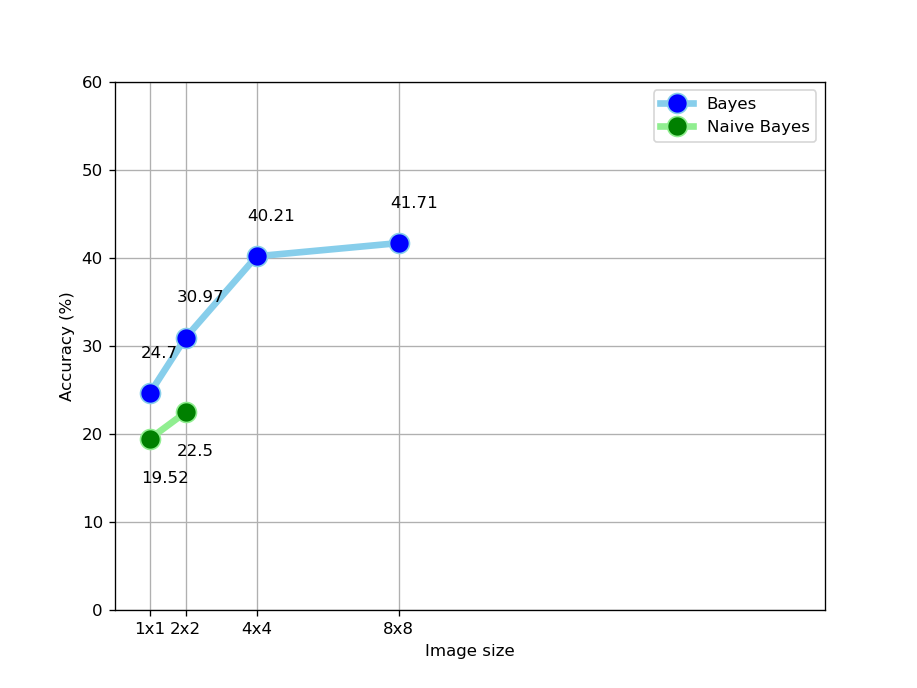

Text(0, 0.5, 'Accuracy (%)')

In [32]:
%matplotlib notebook

y = acc_b_1, acc_b_2, acc_b_4 , acc_b_8 
y_n = acc_nb_1, acc_nb_2
x = np.array([1,2])
x_b = np.array([1,2,4,8])

my_xticks = ['1x1','2x2','4x4','8x8']
plt.xticks(x_b, my_xticks)
plt.plot(x_b, y, marker='o',markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label = "Bayes")
plt.legend()
plt.grid(True)
plt.axis([0,20,0,60])


for i,j in zip(x_b,y):
    plt.annotate(str(j),xy=(i-0.25,j+4))
    
    
plt.plot(x, y_n, marker='o',markerfacecolor='green', markersize=12, color='lightgreen', linewidth=4, label = 'Naive Bayes')
plt.legend()
for i,j in zip(x,y_n):
    plt.annotate(str(j),xy=(i-0.25,j-5))

plt.xlabel('Image size')
plt.ylabel('Accuracy (%)')